# Ajuste de funciones lineales y no lineales

Prof: Felipe Gómez

26-oct-2015

# Ajuste Polinomial

Tenemos una serie de datos experimentales x,y (con ruido) obtenidos de un lanzamiento parabólico:

Populating the interactive namespace from numpy and matplotlib


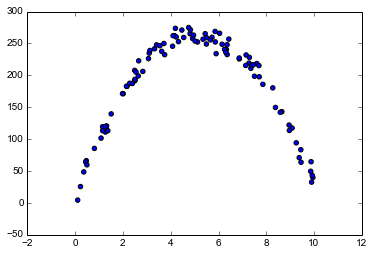

In [1]:
%pylab inline

a = 10
b = +100
c = -9.8

x     = np.random.uniform(0.,10,100)
ruido = np.random.normal(0.0,10,100)
y     = a + b*x + c*x**2 + ruido

scatter(x,y)

Y queremos ajustarlos a una función polinomial de segundo grado de la forma:

$$ f(x) = a + bx + cx^2  $$

In [2]:
def cuadratica(x,a,b,c):
    return a + b*x + c*x**2

Importaremos el módulo curve_fit de scipy y hacemos el ajuste de nuestra función a los datos experimentales

In [3]:
from scipy.optimize import curve_fit

curve_fit( cuadratica, x, y)

(array([ 11.16031584,  99.00084619,  -9.70363912]),
 array([[ 8.24004333, -3.21017295,  0.26358487],
        [-3.21017295,  1.61145344, -0.14808038],
        [ 0.26358487, -0.14808038,  0.01457345]]))

Este método nos devuelve dos listas, una con los parámetros que dan el ajuste óptimo (popt) y otra lista con la matriz de covarianza de los parámetros (pcov)

In [4]:
popt, pcov = curve_fit( cuadratica, x, y )

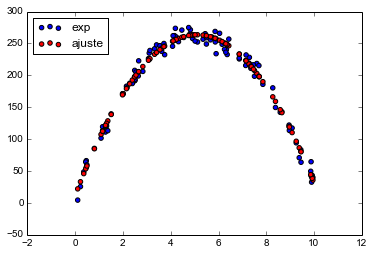

In [5]:
y_opt = cuadratica( x, popt[0], popt[1], popt[2] )

scatter(x, y, label="exp")
scatter(x, y_opt, c="r", label="ajuste")
legend(loc=2)

# ¿Qué estamos optimizando?

Podemos comparar los valores experimentales "y" con los valores encontrados con nuestro ajuste "y_opt"

In [6]:
print "y[0]    =", y[0]
print "y_opt[0]=", y_opt[0]

print "Diferencia=", y[0] - y_opt[0]

y[0]    = 191.289975311
y_opt[0]= 197.25671098
Diferencia= -5.96673566903


In [7]:
( y[0] - y_opt[0] )**2

35.601934544041484

Definimos $\chi^2$ (chi cuadrado) como la suma de la diferencia al cuadrado entre los valores observados y los estimados:

$$ \chi^2 = \sum_{n=0}^N \left( y_n^\textrm{obs} - y_n^\textrm{fit} \right)^2$$

Y es justamente $\chi^2$ lo que queremos minimizar usando el método scipy.optimize.curve_fit. 

Cuando calculamos $\chi^2$ con los parámetros óptimos tenemos:

In [8]:
chi_sqr = sum( ( y - y_opt )**2 )

print chi_sqr

7992.92523109


Probemos ahora cuál sería $\chi^2$ con parámetros que están lejos de los parámetros óptimos:

In [9]:
y_guess = cuadratica(x, 20, 80, -10)
print sum( ( y - y_guess )**2 )

1292657.02692


Con esto:

$\chi^2_\textrm{optimo} \sim 10^5$ ^__^

y

$\chi^2_\textrm{guess} \sim 10^7$ -__-

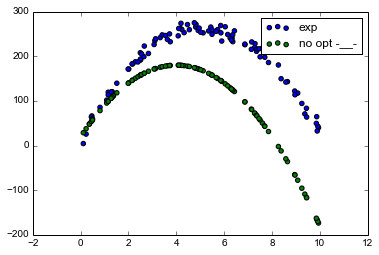

In [10]:
scatter(x,y, label="exp")
scatter(x,y_guess, label="no opt -__-", c="g")
legend(loc=0)

# Ajuste de una función No Lineal

In [11]:
def gaussiana(x, ampl, x_0, sigma):
    return ampl*exp( -(x-x_0)**2/sigma )

Tenemos ahora unos datos observados (con ruido) que se ajustan a una gaussiana con una amplitud de $A = 8.0$, centrada en $x_0=1.0$, con un ancho $\sigma=0.5$.

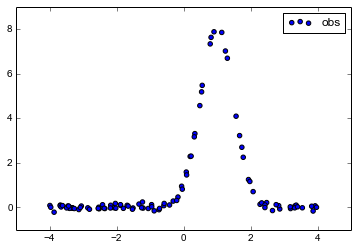

In [12]:
x     = np.random.uniform(-4,4, 100)
noise = np.random.normal(0., 0.1, 100)
y     =  gaussiana( x, 8.0, 1.0, 0.5 ) + noise

scatter(x,y, label="obs")
legend(loc=0)

In [13]:
p_opt, p_cov = curve_fit( gaussiana, x, y)

In [14]:
p_opt

array([ 8.05601075,  0.99803234,  0.48909534])

Los parámetros de mejor ajuste encontrados son $A = 8.018$, $x_0 = 1.004$, y $\sigma = 0.506$

^__^

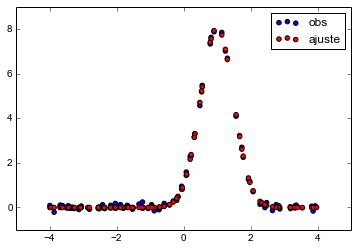

In [15]:
y_opt = gaussiana(x, p_opt[0], p_opt[1], p_opt[2])

scatter(x,y, label="obs")
scatter(x,y_opt, c="r", label="ajuste")
legend(loc=0)

#Referencias:

Curso de Python para Físicos del Max Planck Institute for Astrophysics

http://www2.mpia-hd.mpg.de/~robitaille/PY4SCI_SS_2014/_static/15.%20Fitting%20models%20to%20data.html

Documentación oficial de scipy.optimize.curve_fit

http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit